In [1]:
import pandas as pd

In [16]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [28]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [19]:
df.drop(['Serial No.'] , axis=1 , inplace=True)

In [24]:
x = df.drop(['Chance of Admit '] , axis=1)

In [26]:
y = df[['Chance of Admit ']]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [36]:
x_train_scaled = scaler.fit_transform(x_train)

In [37]:
x_test_scaled = scaler.transform(x_test)

In [40]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [99]:
model = Sequential()
model.add(Dense(7 , input_shape = x_train_scaled[0].shape , activation='relu'))
model.add(Dense(7 , activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error' , optimizer = 'adam')

C:\Users\KIIT\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [101]:
history = model.fit(x_train_scaled , y_train , epochs=200 , validation_split=0.2)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 1.7635 - val_loss: 1.6801
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4651 - val_loss: 1.4042
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2725 - val_loss: 1.1763
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0914 - val_loss: 0.9900
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9054 - val_loss: 0.8389
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7513 - val_loss: 0.7136
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.6759 - val_loss: 0.6114
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5657 - val_loss: 0.5293
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5132 - val_loss: 0.4655
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4418 - val_loss: 0.4166
Epoch 11/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3887 - val_loss: 0.3756
Epoch 12/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.

In [102]:
prediction = model.predict(x_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [103]:
from sklearn.metrics import r2_score

In [104]:
r2_score(y_test , prediction)

0.8160314000799153

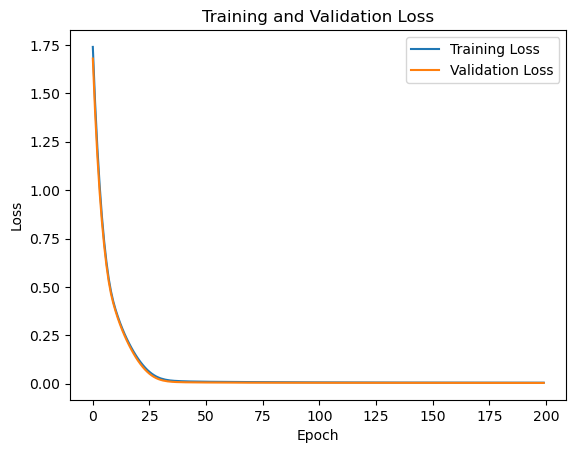

In [110]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
